In [182]:
import pandas as pd
import matplotlib as mpl
from collections import Counter
import matplotlib.pyplot  as plt
import numpy as np

In [35]:
local_file="movies_title.basics.csv"
source=local_file
df = pd.read_csv(source)

/Users/amjad/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [46]:
df.head()


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,20,"Documentary,News,Sport"
2,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,\N,\N,"Biography,Drama"
3,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
4,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Biography,Crime,Drama"


### Descriptive Stats

In [50]:
# total number of rows
n = df['titleType'].count()
print('total # movies: {:d}' .format(n))

total # movies: 467430


In [51]:
# Percent of missing genres 
pr_missing = df.loc[df['genres']=='\\N']['genres'].count()/df['genres'].count()*100
print('Percent of missing genres: {:.2f}%' .format(pr_missing))

Percent of missing genres: 17.55%


In [183]:
#filter out missing genres 
flt_df=df.loc[df['genres']!='\\N']


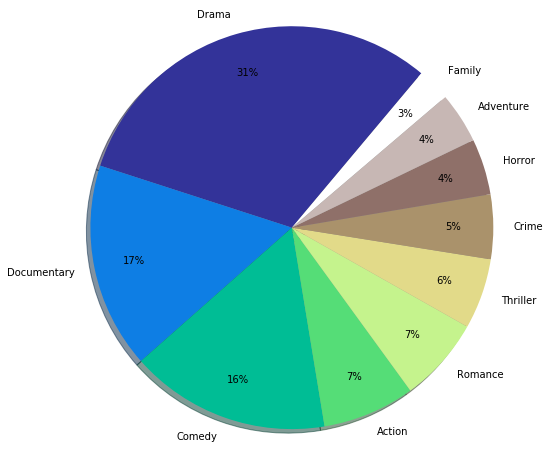

In [193]:
# count # of movies in each genre, and then pick top 10 genres 
genre, count = list(zip(*Counter(','.join(flt_df['genres']).replace(' ', '').split(',')).most_common(10)))

# Make a nicer looking pie chart
cmap = plt.cm.terrain
colors = cmap(np.linspace(0., 1., len(genre)))
plt.figure(figsize = (8, 8))
plt.pie(count, labels=genre, autopct='%.0f%%', shadow=True,colors=colors,pctdistance=0.8,startangle=50)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()

In [321]:
prc_runtime=flt_df.loc[flt_df['runtimeMinutes']=='\\N']['runtimeMinutes'].count()/flt_df['runtimeMinutes'].count()*100
print('Percent of missing runtimeMinutes  {:.2f}%'.format(prc_runtime))

Percent of missing runtimeMinutes  31.83%


In [209]:
runtime=flt_df.loc[flt_df['runtimeMinutes']!='\\N'].runtimeMinutes.astype(int)
runtime.describe()

count    262726.00000
mean         87.75184
std          51.66225
min           1.00000
25%          74.00000
50%          89.00000
75%          99.00000
max       14400.00000
Name: runtimeMinutes, dtype: float64

In [309]:
runtime.describe()

count    262726.00000
mean         87.75184
std          51.66225
min           1.00000
25%          74.00000
50%          89.00000
75%          99.00000
max       14400.00000
Name: runtimeMinutes, dtype: float64

In [339]:
max_3sd=runtime.mean()+runtime.std()*3
min_3sd=runtime.mean()-runtime.std()*3 
# number of outliers
runtime[runtime>within_3sd].count()


14

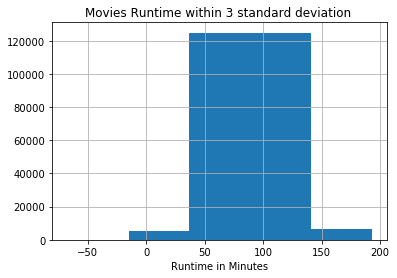

In [340]:
# movies runtime within 3 standard deviation 
plt.hist(runtime,bins=range(round(min_3sd),round(max_3sd),round(runtime.std())))
plt.grid(True)
plt.title('Movies Runtime within 3 standard deviation ')
plt.xlabel('Runtime in Minutes')
plt.show()

In [322]:
# count the # of missing startYear
pr_missing_sdate= flt_df.loc[flt_df['startYear']=='\\N']['startYear'].count()/flt_df['startYear'].count()*100
print('Percent of missing startYear: {:.2f}%'.format(pr_missing_sdate)) 

Percent of missing startYear: 8.75%


In [288]:
start_year=flt_df.loc[flt_df['startYear']!='\\N'].startYear.astype(int)
start_year.describe()

count    351672.000000
mean       1989.278956
std          28.148937
min        1894.000000
25%        1972.000000
50%        2001.000000
75%        2012.000000
max        2115.000000
Name: startYear, dtype: float64

In [295]:
# number of movies with start_year > 2017
start_year[start_year>2017].count()

6564

In [318]:
# number of movies between 2000-2010 
start_year[(start_year<=2000) |(start_year<=2010) ].count()

243826

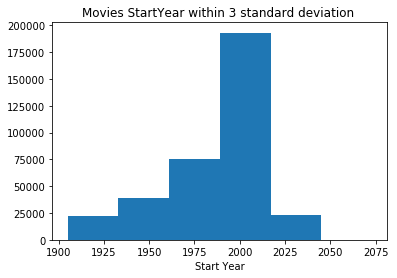

In [341]:
max_3sd=start_year.mean()+start_year.std()*3
min_3sd=start_year.mean()-start_year.std()*3 
plt.hist(start_year,bins=range(round(min_3sd),round(max_3sd),round(start_year.std())))
plt.title('Movies StartYear within 3 standard deviation ')
plt.xlabel('Start Year')
plt.show()


### So what do we know about this data set now?
- A large percentage of runtimeMinutes with missing values.
- Most of the movies are set in the early 2000s
- The top 10 genres: 
('Drama',
 'Documentary',
 'Comedy',
 'Action',
 'Romance',
 'Thriller',
 'Crime',
 'Horror',
 'Adventure',
 'Family')